In [4]:
import numpy as np
import sfm
import matplotlib.pyplot as plt
import os

In [8]:
#### POSE ESTIMATION FROM TWO VIEWS ###


npz_file = '../RANSAC/results/inliers/Img02_Try1_12M_vs_Img25_Try1_12M_inliers.npz'
npz_file2 = '../RANSAC/results/inliers/Img02_Try1_12M_vs_Img14_Try1_12M_inliers.npz'
data = np.load(npz_file)
data2 = np.load(npz_file2)
c1_keypoints1 = data['keypoints0']  # Keypoints de la primera imagen
c1_keypoints2 = data['keypoints1']  # Keypoints de la primera imagen
c2_keypoints1 = data2['keypoints0']  # Keypoints de la segunda imagen
c2_keypoints2 = data2['keypoints1']  # Keypoints de la segunda imagen
# matches = data['matches']  # Matches entre los keypoints de la primera y segunda imagen
# inliers_mask = data['inliers_matches']  # Inliers encontrados por RANSAC
print(c1_keypoints1.shape)
print(c2_keypoints1.shape)
print(c1_keypoints2.shape)
print(c2_keypoints2.shape)
print(c1_keypoints1[0:10])
print(c2_keypoints1[0:10])

(5073, 2)
(5073, 2)
(4630, 2)
(5064, 2)
[[  80.21874    32.968746]
 [ 147.15623    32.968746]
 [ 225.90623    32.968746]
 [ 284.96872    32.968746]
 [ 336.15622    32.968746]
 [ 485.78122    32.968746]
 [ 828.3437     32.968746]
 [1611.9061     32.968746]
 [ 312.53122    36.906246]
 [ 363.71872    36.906246]]
[[  80.21874    32.968746]
 [ 147.15623    32.968746]
 [ 225.90623    32.968746]
 [ 284.96872    32.968746]
 [ 336.15622    32.968746]
 [ 485.78122    32.968746]
 [ 828.3437     32.968746]
 [1611.9061     32.968746]
 [ 312.53122    36.906246]
 [ 363.71872    36.906246]]


In [ ]:

print('Keypoints 1:', keypoints1.shape)
print('Keypoints 2:', keypoints2.shape)
print('Matches:', matches.shape)
print('Inliers:', inliers_mask.shape)
print(keypoints1[0:5,:])
print(keypoints2[0:5,:])
print(matches[0:5,:])
print(inliers_mask[0:5])

point1_img1 = keypoints1[matches[0, 0]]
point1_img2 = keypoints2[matches[0, 1]]
print(matches[0, 0])
print(matches[0, 1])
print(point1_img1)
print(point1_img2)

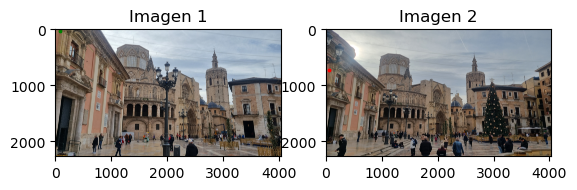

In [17]:

Img1 = '../Images/Set_12MP/Group1/Img02_Try1_12M.jpg'
Img2 = '../Images/Set_12MP/Group1/Img25_Try1_12M.jpg'
img1 = plt.imread(Img1)
img2 = plt.imread(Img2)
# Mostrar la primera imagen
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.scatter(point1_img1[0], point1_img1[1], c='g', marker='o', s=3)
plt.title('Imagen 1')


# Mostrar la segunda imagen
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.scatter(point1_img2[0], point1_img2[1], c='r', marker='o', s=3)
plt.title('Imagen 2')

plt.show()

In [21]:

matched_inliers1 = keypoints1[matches[:, 0]] 
matched_inliers2 = keypoints2[matches[:, 1]] 
x1_h = np.vstack((matched_inliers1.T, np.ones(matched_inliers1.T.shape[1])))
x2_h = np.vstack((matched_inliers2.T, np.ones(matched_inliers2.T.shape[1])))


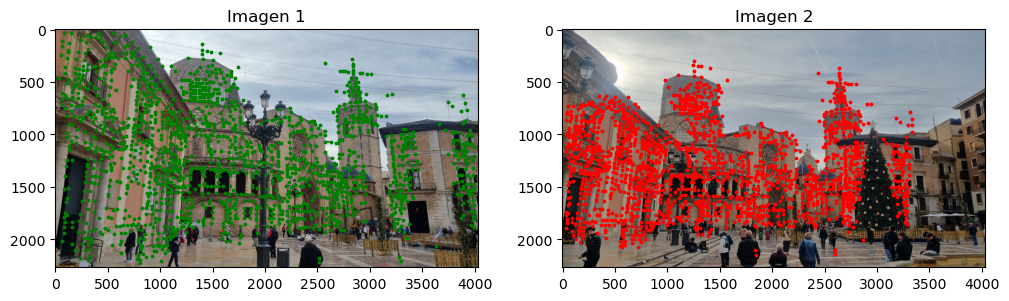

In [22]:
Img1 = '../Images/Set_12MP/Group1/Img02_Try1_12M.jpg'
Img2 = '../Images/Set_12MP/Group1/Img25_Try1_12M.jpg'

img1 = plt.imread(Img1)
img2 = plt.imread(Img2)

plt.figure(figsize=(12, 6))

# Mostrar la primera imagen
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.scatter(x1_h[0, :], x1_h[1, :], c='g', marker='o', s=3)
plt.title('Imagen 1')

# Mostrar la segunda imagen
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.scatter(x2_h[0, :], x2_h[1, :], c='r', marker='o', s=3)
plt.title('Imagen 2')

plt.show()